# **BMEN 4470 - Deep Learning for Biomedical Signal Processing**
# **Homework 2: Basics of Modeling Sequences and Temporal Convolution Networks**

Due 11:59pm on October 18th, 2021



In [ ]:
#Keeping in mind the running time, this code is run on GPU runtime mode.
#Also include the databse before running programs 3(a) onwards.

In [ ]:
!pip install bunch
#Import
import sys
import torch
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import scipy.io as sio
from bunch import Bunch
import torch.optim as optim
from pandas import DataFrame
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.autograd import Variable
from torch.nn.utils import weight_norm
from os.path import dirname, join as pjoin
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score

  Created wheel for bunch: filename=bunch-1.0.1-py3-none-any.whl size=7092 sha256=a276ebbbb0ada31653711cddca7d0c1a7f7cf2e46250a236337ceddc0d97e17e
  Stored in directory: /root/.cache/pip/wheels/10/ad/12/a8818fda74a365129e0f316c41a12dead904b60534d2114448
Successfully built bunch


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Problem 1: ARMA Model** In this question, you need to apply three different Autoregressive Moving Average Model (ARMA) to the given EKG signal. Compare the input and output signals and answering the following questions. 

In [ ]:
# The EGK signal contains 100 data points
EKG_sig = [41.985077,48.505554,17.868908,-17.902781,-25.676805,2.4074743,40.308300,50.589020,22.663403,-16.953960,-32.144905,-31.155527,-23.732307,6.5244060,44.417355,58.700817,60.295696,58.277584,51.427200,24.971256,18.454710,42.659885,28.012609,13.741727,14.357091,15.576780,11.927580,-14.444111,-25.185453,-19.081909,6.6035562,17.284658,17.544495,16.928368,-6.3161540,-14.990187,10.754345,21.378378,-3.1653652,-13.225622,15.521652,54.976814,64.869339,35.326790,-5.0551395,-18.008286,-15.629535,-11.389389,15.224802,52.611454,69.125626,71.429947,69.159081,63.929958,35.759071,-1.0452937,-12.551209,9.9472542,23.483477,29.982676,53.127209,38.299618,26.093702,25.454752,0.92754990,-9.3693218,19.490158,56.732342,40.379166,1.2176796,15.432666,53.198875,38.633102,1.4428799,12.662603,25.239782,24.835445,19.891754,-6.5586896,3.0409441,15.515370,13.531504,6.8291478,-15.963812,0.38266551,33.888634,14.340966,-27.637432,-37.876808,-12.587003,-1.4763706,-1.0964720,20.268143,5.8535609,-29.653194,-16.162226,18.147284,6.5141749,-4.5157704,13.640582]

**1(a)** Moving Average model only

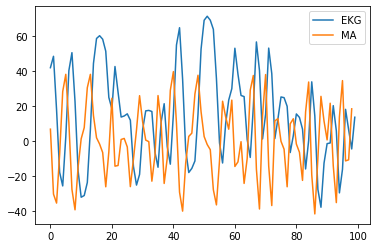

array([13.35427397, 13.06796594, 12.78165791, 12.49534988, 12.20904185,
       11.92273382, 11.63642579, 11.35011776, 11.06380973])

In [ ]:
model_1 = ARIMA(EKG_sig, order=(0,1,0))# put the order here
model_fit_1 = model_1.fit()
residuals_1 = DataFrame(model_fit_1.resid)

# line plot of the results
plt.plot(EKG_sig, label='EKG')
plt.plot(residuals_1, label='MA')
plt.legend()
plt.show()
predictions=model_fit_1.forecast(steps=9)[0]
predictions


In [ ]:
# predictions=model_fit_1.forecast(steps=9)[0]
predictions=model_fit_1.forecast(steps=9)[0]
predictions
print(model_fit_1.aic)

890.59953127858


**1(b)** Autoregressive model only

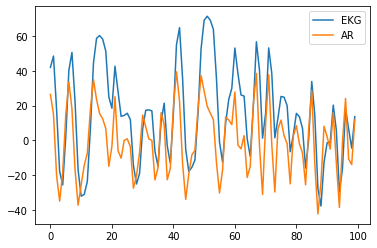

884.3676607615904


In [ ]:
model_2 = ARIMA(EKG_sig, order=(1,0,0))# put the order here
model_fit_2 = model_2.fit()
residuals_2 = DataFrame(model_fit_2.resid)

# line plot of the results
plt.plot(EKG_sig, label='EKG')
plt.plot(residuals_2, label='AR')
plt.legend()
plt.show()
predictions=model_fit_2.forecast(steps=9)[0]
predictions
print(model_fit_2.aic)

**1(c)** ARMA model with p = 5, q = 1

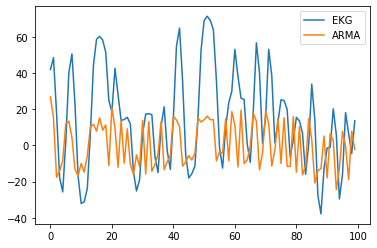

805.7567490414772


In [ ]:
model_3 = ARIMA(EKG_sig, order=(5,0,1))# put the order here
model_fit_3 = model_3.fit()
residuals_3 = DataFrame(model_fit_3.resid)

# line plot of the results
plt.plot(EKG_sig, label='EKG')
plt.plot(residuals_3, label='ARMA')
plt.legend()
plt.show()
predictions=model_fit_3.forecast(steps=9)[0]
predictions
print(model_fit_3.aic)

**1(d)** What are the differences between those three models? Which model works best for this EKG data? What are the pros and cons of each model? Please list at least one pro and con for each model. 

On the basis of these three are values of p, d and q, denoting p is the number of autoregressive terms, d is the number of nonseasonal differences needed for stationarity, and q is the number of lagged forecast errors in the prediction equation.

ARMA model with Autoregressive model works best beacause it is having less AIC(Akaike's Information Criterion) value shown above, **884.3676607615904** where as others are having 805.7567 and 824.6000925.

Main concern while apply these three models are:




**1. Moving Average model **

pros: Random jumps in the time series plot whose effect is felt in two or more consecutive periods.
cons: A purely MA model would smooth out these sudden jumps like the exponential smoothing method, which is impractical. 

---


**2. Autoregressive model**

pros: An autoregressive process consists of a linear function of the previous observation plus random noise.
cons: The forecast is a compromise between the most recent data value and the long-term mean value of the series.

---


**3. ARMA model with p = 5, q = 1**

pros: Programmer can append as per his choice.
cons: While selecting values of p, q in this model, these parameters have to be effectively determined for an effective model

```
# This is formatted as code
```



Your Answers:

**Problem 2 Temporal Convolutional Networks** In this question, we will generate a dataset and build a simple TCN to train and test on the dataset. 

This dataset contains some data sequences: a pair of input sequences and an output. The first sequence within the input pair is composed of numbers randomly sampled from the range [0, 1]. The second input sequence within the input pair is composed of only integers: 0 or 1. This sequence must contain only two integer 1; the rest of the integers are all 0s. The output is the sum of the two values from the first input sequence corresponding to 1s in the second input sequence. 

For example, one input sequence pair can be [[0, 0.1, 0.2, 0.3, 0.4, 0.5], [0, 0, 0, 1, 1, 0]]. In this case, the final output value should be 0.3 + 0.4 = 0.7. In this example, the length of the data sequence is 6.

For the detail of TCN, see the GitHub repo [here](https://github.com/locuslab/TCN/tree/master/TCN/adding_problem).

In [ ]:
# data generator
def data_generator(N, seq_length):
    """
    Args:
        seq_length: Length of the adding problem data
        N: # of data in the set
    """
    X_num = torch.rand([N, 1, seq_length])
    X_mask = torch.zeros([N, 1, seq_length])
    Y = torch.zeros([N, 1])
    for i in tqdm(range(N)):
        positions = np.random.choice(seq_length, size=2, replace=False)
        X_mask[i, 0, positions[0]] = 1
        X_mask[i, 0, positions[1]] = 1
        Y[i,0] = X_num[i, 0, positions[0]] + X_num[i, 0, positions[1]]
    X = torch.cat((X_num, X_mask), dim=1)
    return Variable(X), Variable(Y)

In [ ]:
# generate data
X_train, Y_train = data_generator(5000, 100)
X_test, Y_test = data_generator(100, 100)

100%|██████████| 100/100 [00:00<00:00, 5165.08it/s]


In [ ]:
# define several classes for training.
class TCN(nn.Module):
    def __init__(self, input_size, output_size, num_channels, kernel_size, dropout):
        super(TCN, self).__init__()
        self.tcn = TemporalConvNet(input_size, num_channels, kernel_size=kernel_size, dropout=dropout)
        self.linear = nn.Linear(num_channels[-1], output_size)
        self.init_weights()

    def init_weights(self):
        self.linear.weight.data.normal_(0, 0.01)

    def forward(self, x):
        y1 = self.tcn(x)
        return self.linear(y1[:, :, -1])


class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super(Chomp1d, self).__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        return x[:, :, :-self.chomp_size].contiguous()

class TemporalConvNet(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size,
                                     padding=(kernel_size-1) * dilation_size, dropout=dropout)]

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


**2(a)** Build your TCN model below. Your model should contain two convolutional layers.

In [ ]:
class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, padding, dropout=0.2):
        super(TemporalBlock, self).__init__()
        # Your Code:
        self.conv1 = weight_norm(nn.Conv1d(n_inputs, n_outputs, kernel_size,
                                           stride=stride, padding=padding, dilation=dilation))
        self.chomp1 = Chomp1d(padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = weight_norm(nn.Conv1d(n_outputs, n_outputs, kernel_size,
                                           stride=stride, padding=padding, dilation=dilation))
        self.chomp2 = Chomp1d(padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        self.net = nn.Sequential(self.conv1, self.chomp1, self.relu1, self.dropout1,
                                 self.conv2, self.chomp2, self.relu2, self.dropout2)
        self.downsample = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.relu = nn.ReLU()
        self.init_weights()

    def init_weights(self):
        self.conv1.weight.data.normal_(0, 0.01)
        self.conv2.weight.data.normal_(0, 0.01)
        if self.downsample is not None:
            self.downsample.weight.data.normal_(0, 0.01)

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)

**2(b)** Set and adjust the training parameters to make the Average Difference you got from your network smaller than 0.008. 

In [ ]:
# initialize training parameters.
args = Bunch()
# adjustable parameters
args.epochs = 35 # put values here
args.ksize =5 # put values here
args.batch_size = 64 # put values here
args.lr = 2e-3 # put values here

# fix parameters
args.cuda = True
args.dropout = False
args.seq_len = 100
args.clip = -1
args.levels = 8
args.log_interval = 100
args.optim = 'Adam'
args.nhid = 30
args.seed = 112


Train your model. You need to use GPU for training here. To start a GPU on your Colab, follow the instruction on the slides for this assignment. Please re-run the first block after you set up the GPU. 

In [ ]:
# train the model with two conv layers
torch.manual_seed(args.seed)
if torch.cuda.is_available():
    if not args.cuda:
        print("WARNING: You have a CUDA device, so you should probably run with --cuda")

input_channels = 2
n_classes = 1
batch_size = args.batch_size
seq_length = args.seq_len
epochs = args.epochs


# Note: We use a very simple setting here (assuming all levels have the same # of channels.
channel_sizes = [args.nhid]*args.levels
kernel_size = args.ksize
dropout = args.dropout
model = TCN(input_channels, n_classes, channel_sizes, kernel_size=kernel_size, dropout=dropout)

if args.cuda:
    model.cuda()
    X_train = X_train.cuda()
    Y_train = Y_train.cuda()
    X_test = X_test.cuda()
    Y_test = Y_test.cuda()

lr = args.lr
optimizer = getattr(optim, args.optim)(model.parameters(), lr=lr)


def train(epoch):
    global lr
    model.train()
    batch_idx = 1
    total_loss = 0
    for i in range(0, X_train.size(0), batch_size):
        if i + batch_size > X_train.size(0):
            x, y = X_train[i:], Y_train[i:]
        else:
            x, y = X_train[i:(i+batch_size)], Y_train[i:(i+batch_size)]
        optimizer.zero_grad()
        output = model(x)
        loss = F.mse_loss(output, y)
        loss.backward()
        if args.clip > 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), args.clip)
        optimizer.step()
        batch_idx += 1
        total_loss += loss.item()

        if batch_idx % args.log_interval == 0:
            cur_loss = total_loss / args.log_interval
            processed = min(i+batch_size, X_train.size(0))
            print('Train Epoch: {:2d} [{:6d}/{:6d} ({:.0f}%)]\tLearning rate: {:.4f}\tLoss: {:.6f}'.format(
                epoch, processed, X_train.size(0), 100.*processed/X_train.size(0), lr, cur_loss))
            total_loss = 0


def evaluate():
    model.eval()
    with torch.no_grad():
        output = model(X_test)
        test_loss = F.mse_loss(output, Y_test)
        print('\nValidation set: Average loss: {:.6f}\n'.format(test_loss.item()))
        return test_loss.item()


for ep in range(1, epochs+1):
    train(ep)
    tloss = evaluate()


Validation set: Average loss: 0.155193


Validation set: Average loss: 0.142366


Validation set: Average loss: 0.142070


Validation set: Average loss: 0.137194


Validation set: Average loss: 0.132567


Validation set: Average loss: 0.038792


Validation set: Average loss: 0.016945


Validation set: Average loss: 0.008496


Validation set: Average loss: 0.006114


Validation set: Average loss: 0.003142


Validation set: Average loss: 0.002070


Validation set: Average loss: 0.001230


Validation set: Average loss: 0.001142


Validation set: Average loss: 0.000939


Validation set: Average loss: 0.000939


Validation set: Average loss: 0.000996


Validation set: Average loss: 0.000820


Validation set: Average loss: 0.000696


Validation set: Average loss: 0.000772


Validation set: Average loss: 0.000808


Validation set: Average loss: 0.000820


Validation set: Average loss: 0.000957


Validation set: Average loss: 0.000738


Validation set: Average loss: 0.000388


Validation set:

In [ ]:
# show the results. You will get full credit if the average differences is less than 0.02
preds = model(X_test)

total_diff = 0
for i,pred in enumerate(preds):
    total_diff += np.abs(pred.data.item() - Y_test[i].item())


print('Average Difference:', total_diff/len(Y_test))

Average Difference: 0.018701996505260467


In [ ]:
!pip install keras-tcn

     |████████████████████████████████| 1.1 MB 5.4 MB/s 


**2(c)** Now build a TCN model with only one convolutional layer. Use the same parameter you set in 2(b) and train your network.

In [ ]:
class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, padding, dropout=0.2):
        super(TemporalBlock, self).__init__()

        # Your Code:
        self.conv1 = weight_norm(nn.Conv1d(n_inputs, n_outputs, kernel_size,
                                           stride=stride, padding=padding, dilation=dilation))
        self.chomp1 = Chomp1d(padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)


        self.net = nn.Sequential(self.conv1, self.chomp1, self.relu1, self.dropout1)
        self.downsample = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.relu = nn.ReLU()
        self.init_weights()

    def init_weights(self):
        self.conv1.weight.data.normal_(0, 0.01)
        if self.downsample is not None:
            self.downsample.weight.data.normal_(0, 0.01)

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)


# train the model with two conv layers
torch.manual_seed(args.seed)
if torch.cuda.is_available():
    if not args.cuda:
        print("WARNING: You have a CUDA device, so you should probably run with --cuda")

input_channels = 2
n_classes = 1
batch_size = args.batch_size
seq_length = args.seq_len
epochs = args.epochs


# Note: We use a very simple setting here (assuming all levels have the same # of channels.
channel_sizes = [args.nhid]*args.levels
kernel_size = args.ksize
dropout = args.dropout
model = TCN(input_channels, n_classes, channel_sizes, kernel_size=kernel_size, dropout=dropout)

if args.cuda:
    model.cuda()
    X_train = X_train.cuda()
    Y_train = Y_train.cuda()
    X_test = X_test.cuda()
    Y_test = Y_test.cuda()

lr = args.lr
optimizer = getattr(optim, args.optim)(model.parameters(), lr=lr)


for ep in range(1, epochs+1):
    train(ep)
    tloss = evaluate()

# show the result
preds = model(X_test)

total_diff = 0
for i,pred in enumerate(preds):
    total_diff += np.abs(pred.data.item() - Y_test[i].item())


print('Average Difference:', total_diff/len(Y_test))


Validation set: Average loss: 0.160798


Validation set: Average loss: 0.158274


Validation set: Average loss: 0.160159


Validation set: Average loss: 0.160629


Validation set: Average loss: 0.157917


Validation set: Average loss: 0.156731


Validation set: Average loss: 0.156102


Validation set: Average loss: 0.154782


Validation set: Average loss: 0.146956


Validation set: Average loss: 0.131482


Validation set: Average loss: 0.073362


Validation set: Average loss: 0.031058


Validation set: Average loss: 0.009011


Validation set: Average loss: 0.004851


Validation set: Average loss: 0.003988


Validation set: Average loss: 0.003476


Validation set: Average loss: 0.002779


Validation set: Average loss: 0.002219


Validation set: Average loss: 0.001732


Validation set: Average loss: 0.001456


Validation set: Average loss: 0.001360


Validation set: Average loss: 0.001287


Validation set: Average loss: 0.001197


Validation set: Average loss: 0.001092


Validation set:

**2(d)** Compare the result you get from 2(c) with the average difference you get from 2(b). Which network gives you a better result? Why that network gives a better result? Do you have any suggestions to improve the performance of the network that has poorer performance? 

Your Answers:

**Problem 3: EEGNet** In this question, we will use EEGNet, a compact convolutional network for EEG-based brain-computer interfaces. Your task is to process the given EEG data so that you can train and test the network on the dataset. For more detail about the EEGNet, please see the GitHub repo here:
https://github.com/aliasvishnu/EEGNet.

The EEG data given in this question are generated. Feel free to print or plot the data if you want to know what the dataset looks like. 



In [ ]:
# MOUNTING GOOGLE DRIVE WHERE DATA IS STORED
from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [ ]:
# Import data and save as np.array
import scipy.io as sio
Data = sio.loadmat('/content/sample_data/X.mat')
Label = sio.loadmat('/content/sample_data/Y.mat')
Dataset = Data['Data']
Labels = Label['Labels']
print(Dataset.shape, Labels.shape)

(300, 120, 64) (1, 300)


In [ ]:
print(Data)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Oct  2 15:15:00 2020', '__version__': '1.0', '__globals__': [], 'Data': array([[[0.37085193, 0.7547415 , 0.6039062 , ..., 0.8968384 ,
         0.7620036 , 0.7315859 ],
        [0.81732696, 0.14181083, 0.7353613 , ..., 0.7230805 ,
         0.41436437, 0.3099489 ],
        [0.538366  , 0.7542346 , 0.87139887, ..., 0.9878038 ,
         0.35056293, 0.998703  ],
        ...,
        [0.232185  , 0.8796716 , 0.11465017, ..., 0.4193303 ,
         0.81748843, 0.07150075],
        [0.9020351 , 0.7096457 , 0.66550964, ..., 0.42122287,
         0.16600016, 0.16783883],
        [0.15938947, 0.14227946, 0.31150782, ..., 0.6277139 ,
         0.5050595 , 0.75127983]],

       [[0.61280555, 0.3924576 , 0.501796  , ..., 0.81261337,
         0.29126477, 0.738465  ],
        [0.3890797 , 0.9453673 , 0.09961329, ..., 0.0757245 ,
         0.947396  , 0.6719579 ],
        [0.6881384 , 0.72246975, 0.5950406 , ..., 0.09583863,
         0.22

In [ ]:
print(Label)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Oct  2 15:15:00 2020', '__version__': '1.0', '__globals__': [], 'Labels': array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
        1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
        0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
        1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
        0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 

In [ ]:
print(Data.items())

dict_items([('__header__', b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Oct  2 15:15:00 2020'), ('__version__', '1.0'), ('__globals__', []), ('Data', array([[[0.37085193, 0.7547415 , 0.6039062 , ..., 0.8968384 ,
         0.7620036 , 0.7315859 ],
        [0.81732696, 0.14181083, 0.7353613 , ..., 0.7230805 ,
         0.41436437, 0.3099489 ],
        [0.538366  , 0.7542346 , 0.87139887, ..., 0.9878038 ,
         0.35056293, 0.998703  ],
        ...,
        [0.232185  , 0.8796716 , 0.11465017, ..., 0.4193303 ,
         0.81748843, 0.07150075],
        [0.9020351 , 0.7096457 , 0.66550964, ..., 0.42122287,
         0.16600016, 0.16783883],
        [0.15938947, 0.14227946, 0.31150782, ..., 0.6277139 ,
         0.5050595 , 0.75127983]],

       [[0.61280555, 0.3924576 , 0.501796  , ..., 0.81261337,
         0.29126477, 0.738465  ],
        [0.3890797 , 0.9453673 , 0.09961329, ..., 0.0757245 ,
         0.947396  , 0.6719579 ],
        [0.6881384 , 0.72246975, 0.5950406 , ..., 0.09583

In [ ]:
Data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Data'])

In [ ]:
Label.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Labels'])

In [ ]:
# define the EEGNet
class EEGNet(nn.Module):
    def __init__(self):
        super(EEGNet, self).__init__()
        self.T = 120
        
        # Layer 1
        self.conv1 = nn.Conv2d(1, 16, (1, 64), padding = 0)
        self.batchnorm1 = nn.BatchNorm2d(16, False)
        
        # Layer 2
        self.padding1 = nn.ZeroPad2d((16, 17, 0, 1))
        self.conv2 = nn.Conv2d(1, 4, (2, 32))
        self.batchnorm2 = nn.BatchNorm2d(4, False)
        self.pooling2 = nn.MaxPool2d(2, 4)
        
        # Layer 3
        self.padding2 = nn.ZeroPad2d((2, 1, 4, 3))
        self.conv3 = nn.Conv2d(4, 4, (8, 4))
        self.batchnorm3 = nn.BatchNorm2d(4, False)
        self.pooling3 = nn.MaxPool2d((2, 4))

        # FC Layer
        # NOTE: This dimension will depend on the number of timestamps per sample in your data.
        # here we have 120 timepoints
        self.fc1 = nn.Linear(4*2*7, 1)
        

    def forward(self, x):
        # Layer 1
        x = F.elu(self.conv1(x))
        x = self.batchnorm1(x)
        x = F.dropout(x, 0.25)
        x = x.permute(0, 3, 1, 2)
        
        # Layer 2
        x = self.padding1(x)
        x = F.elu(self.conv2(x))
        x = self.batchnorm2(x)
        x = F.dropout(x, 0.25)
        x = self.pooling2(x)
        
        # Layer 3
        x = self.padding2(x)
        x = F.elu(self.conv3(x))
        x = self.batchnorm3(x)
        x = F.dropout(x, 0.25)
        x = self.pooling3(x)
        
        # FC Layer
        x = x.view(-1, 4*2*7)
        x = torch.sigmoid(self.fc1(x))
        return x


net = EEGNet()

criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters())

In [ ]:
# Define the evaluation function
def evaluate(model, X, Y, params = ["acc"]):
    results = []
    batch_size = 50
    
    predicted = []
    
    for i in range(int(len(X)/batch_size)):
        s = i*batch_size
        e = i*batch_size+batch_size
        
        inputs = Variable(torch.from_numpy(X[s:e]))
        pred = model(inputs)
        
        predicted.append(pred.data.cpu().numpy())
        
        
    inputs = Variable(torch.from_numpy(X))
    predicted = model(inputs)
    
    predicted = predicted.data.cpu().numpy()
    
    for param in params:
        if param == 'acc':
            results.append(accuracy_score(Y, np.round(predicted)))
    return results

In [ ]:
print(x)

NameError: ignored

In [ ]:
print(Y)

NameError: ignored

**3(a)** Now, reshape the data so you can train it using EEGNet. To train the network, you also need to modify the network parameters to match the dimension of your training data. Please see the image [here](https://github.com/aliasvishnu/EEGNet/blob/master/EEGNet.png) for more information. 

In [ ]:
 # Your coode
import numpy as np

X=np.reshape(X,(4,1))
Y=np.reshape(2,1,order='F')


print(X.shape, Y.shape)

NameError: ignored

**3(b)** Now split the training, evaluation, and testing data. Please make sure you have about 80% for training, about 10% for evaluation, and about 10% for testing. Then train your network on the dataset and test it.

In [ ]:
# Your Code: 
# Please name the parameters as names given below in the print function.
#My code_5------------------------------------------------------
X_train = np.random.rand(50, 1, 120, 64).astype('float32') # np.random.rand generates between [0, 1)
y_train = np.round(np.random.rand(50).astype('float32')) # binary data, so we round it to 0 or 1.

X_val = np.random.rand(50, 1, 120, 64).astype('float32')
y_val = np.round(np.random.rand(50).astype('float32'))

X_test = np.random.rand(50, 1, 120, 64).astype('float32')
y_test = np.round(np.random.rand(50).astype('float32'))
#My code_5------------------------------------------------------
print(X_train.shape, X_val.shape,X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)


(50, 1, 120, 64) (50, 1, 120, 64) (50, 1, 120, 64)
(50,) (50,) (50,)


In [ ]:
# train and test on your dataset
batch_size = 16

for epoch in range(40):  # loop over the dataset multiple times
    print("\nEpoch ", epoch)
    
    running_loss = 0.0
    for i in range(int(len(X_train)/batch_size-1)):
        s = i*batch_size
        e = i*batch_size+batch_size
        
        inputs = torch.from_numpy(X_train[s:e])
        labels = torch.FloatTensor(np.array([y_train[s:e]]).T*1.0)
        
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)   
        loss = criterion(outputs, labels)
        loss.backward()
        
        
        optimizer.step()
        
        running_loss += loss.data
    
    # Validation accuracy
    params = ["acc"]
    print("Training Loss ", running_loss)
    print("Train - ", evaluate(net, X_train, y_train, params))
    print("Validation - ", evaluate(net, X_val, y_val, params))




Epoch  0


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Training Loss  tensor(1.5196)
Train -  [0.48]
Validation -  [0.54]

Epoch  1
Training Loss  tensor(1.4626)
Train -  [0.58]
Validation -  [0.5]

Epoch  2
Training Loss  tensor(1.4723)
Train -  [0.48]
Validation -  [0.62]

Epoch  3
Training Loss  tensor(1.3317)
Train -  [0.6]
Validation -  [0.56]

Epoch  4
Training Loss  tensor(1.3762)
Train -  [0.58]
Validation -  [0.48]

Epoch  5
Training Loss  tensor(1.2808)
Train -  [0.56]
Validation -  [0.46]

Epoch  6
Training Loss  tensor(1.1750)
Train -  [0.62]
Validation -  [0.56]

Epoch  7
Training Loss  tensor(1.3367)
Train -  [0.54]
Validation -  [0.52]

Epoch  8
Training Loss  tensor(1.3156)
Train -  [0.62]
Validation -  [0.54]

Epoch  9
Training Loss  tensor(1.3453)
Train -  [0.64]
Validation -  [0.54]

Epoch  10
Training Loss  tensor(1.2647)
Train -  [0.64]
Validation -  [0.48]

Epoch  11
Training Loss  tensor(1.0937)
Train -  [0.64]
Validation -  [0.54]

Epoch  12
Training Loss  tensor(1.0525)
Train -  [0.76]
Validation -  [0.6]

Epoch  1

In [ ]:
# print test accuracy
print("Test - ", evaluate(net, X_test, y_test, params))

Test -  [0.44]


**3(c)** Now, split the data by 50% training, 40% validation, 10% testing, and retrain your model.

In [ ]:
# Your Code:
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
# X_train = 
# y_train = 

# X_val = 
# y_val = 

# X_test = 
# y_test = 


#MY code 6------------------------------------------------------------------------
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, train_size=0.5,test_size=0.10,random_state=0)
#My code 6------------------------------------------------------------------------


print(X_train.shape, X_val.shape,X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

NameError: ignored

In [ ]:
# train and test on the dataset with 50% training, 40% validation, and 10% test data
batch_size = 16

for epoch in range(40):  # loop over the dataset multiple times
    print("\nEpoch ", epoch)
    
    running_loss = 0.0
    for i in range(int(len(X_train)/batch_size-1)):
        s = i*batch_size
        e = i*batch_size+batch_size
        
        inputs = torch.from_numpy(X_train[s:e])
        labels = torch.FloatTensor(np.array([y_train[s:e]]).T*1.0)
        
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)   
        loss = criterion(outputs, labels)
        loss.backward()
        
        
        optimizer.step()
        
        running_loss += loss.data
    
    # Validation accuracy
    params = ["acc", "auc", "fmeasure"]
    print(params)
    print("Training Loss ", running_loss)
    print("Train - ", evaluate(net, X_train, y_train, params))
    print("Validation - ", evaluate(net, X_val, y_val, params))



Epoch  0
['acc', 'auc', 'fmeasure']
Training Loss  tensor(0.7429)
Train -  [0.7]
Validation -  [0.54]

Epoch  1
['acc', 'auc', 'fmeasure']
Training Loss  tensor(0.6969)
Train -  [0.7]
Validation -  [0.52]

Epoch  2
['acc', 'auc', 'fmeasure']
Training Loss  tensor(0.8803)
Train -  [0.74]
Validation -  [0.38]

Epoch  3
['acc', 'auc', 'fmeasure']
Training Loss  tensor(0.7080)
Train -  [0.7]
Validation -  [0.56]

Epoch  4
['acc', 'auc', 'fmeasure']
Training Loss  tensor(0.6434)
Train -  [0.78]
Validation -  [0.5]

Epoch  5
['acc', 'auc', 'fmeasure']
Training Loss  tensor(0.4433)
Train -  [0.72]
Validation -  [0.44]

Epoch  6
['acc', 'auc', 'fmeasure']
Training Loss  tensor(0.5679)
Train -  [0.78]
Validation -  [0.48]

Epoch  7
['acc', 'auc', 'fmeasure']
Training Loss  tensor(0.5010)
Train -  [0.78]
Validation -  [0.58]

Epoch  8
['acc', 'auc', 'fmeasure']
Training Loss  tensor(0.6273)
Train -  [0.74]
Validation -  [0.4]

Epoch  9
['acc', 'auc', 'fmeasure']
Training Loss  tensor(0.6407)
Tr

In [ ]:
print("Test - ", evaluate(net, X_test, y_test, params))

**3(d)** Compare the result you get from 3(d) with the test accuracy in 3(c). Which data split method gives you a better result? Why that method gives a better result? What did you learn from this?

Your Answers: